In [168]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

Read the CSV file 

In [127]:
df = pd.read_csv('C:/Users/vjiph/Downloads/heart.csv')

Copy the dataframe into another variable so that the changes made in one does not affect the other

In [128]:
import copy
df1 = copy.deepcopy(df)

In [129]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


#### Inference
This shows that there are no null values in the dataset and zero categorical variables

### Attribute Information
1.  age      - Age of the Person
2.  sex      - Gender of the Person
3.  cp       - Chest pain type (4 values)
4.  trestbps - Resting blood pressure
5.  chol     - Serum cholestoral in mg/dl
6.  fbs      - Fasting blood sugar > 120 mg/dl
7.  restecg  - Resting electrocardiographic results (values 0,1,2)
8.  thalach  - Maximum heart rate achieved
9.  exang    - Exercise induced angina
10. oldpeak  - ST depression induced by exercise relative to rest
11. slope    - The slope of the peak exercise ST segment
12. ca       - Number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [131]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### People having a defected heart are more than the people having healthy heart

In [132]:
df.groupby('sex').mean()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


- The average age of a female being diagnosed for heart disease is 55.
- The average age of a male being diagnosed for heart disease is 53.

In [133]:
df['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [134]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [135]:
df['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

In [136]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [137]:
df.shape

(303, 14)

This dataframe consists of 303 rows with 14 attributes.

### Convert the 'target' variable from int to category to perform categorical functions on it

In [138]:
df1.target = df.target.astype('category')

In [139]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    int64   
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    int64   
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    int64   
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    category
dtypes: category(1), float64(1), int64(12)
memory usage: 31.3 KB


<AxesSubplot:xlabel='target', ylabel='count'>

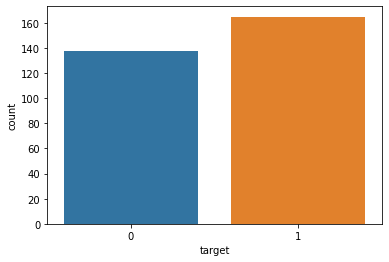

In [140]:
sns.countplot(x='target', data=df)

### Inference: 
People having a defected heart are more than the people with healthy heart.


<AxesSubplot:xlabel='sex', ylabel='count'>

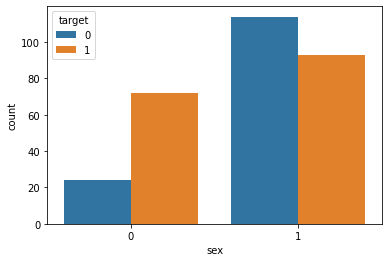

In [141]:
sns.countplot(x='sex', data=df, hue='target')

#### 0 --> Female
#### 1 --> Male 
- Among females, the number of females having heart disease is more than the ones without heart disease.
- Among males, the number of males having heart disease is less than the ones without heart disease.

### Data Analysis

In [142]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

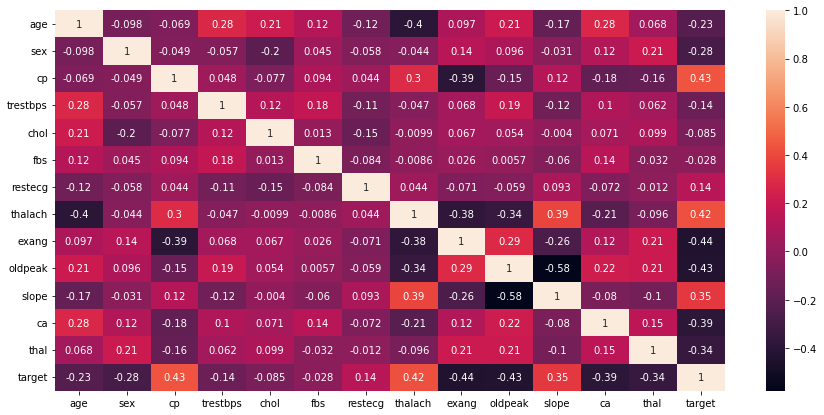

In [143]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True)

### Inference:
- The highest positive relation of target is with 'cp' , that is , 0.43 , 'thalach', that is, 0.42 and slope, that is 0.35
- The highest negative correaltion of target is with 'exang' and 'oldpeak' 

### Feature Selection

In [144]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Create a different dataset consisting of only those features which affect the 'target' most.

In [170]:
df2 = df[['cp','thalach','exang','oldpeak','slope','target']]

In [146]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cp       303 non-null    int64  
 1   thalach  303 non-null    int64  
 2   exang    303 non-null    int64  
 3   oldpeak  303 non-null    float64
 4   slope    303 non-null    int64  
 5   target   303 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 14.3 KB


- There are zero null values in this dataset.
- Datatype of 'target' is int64

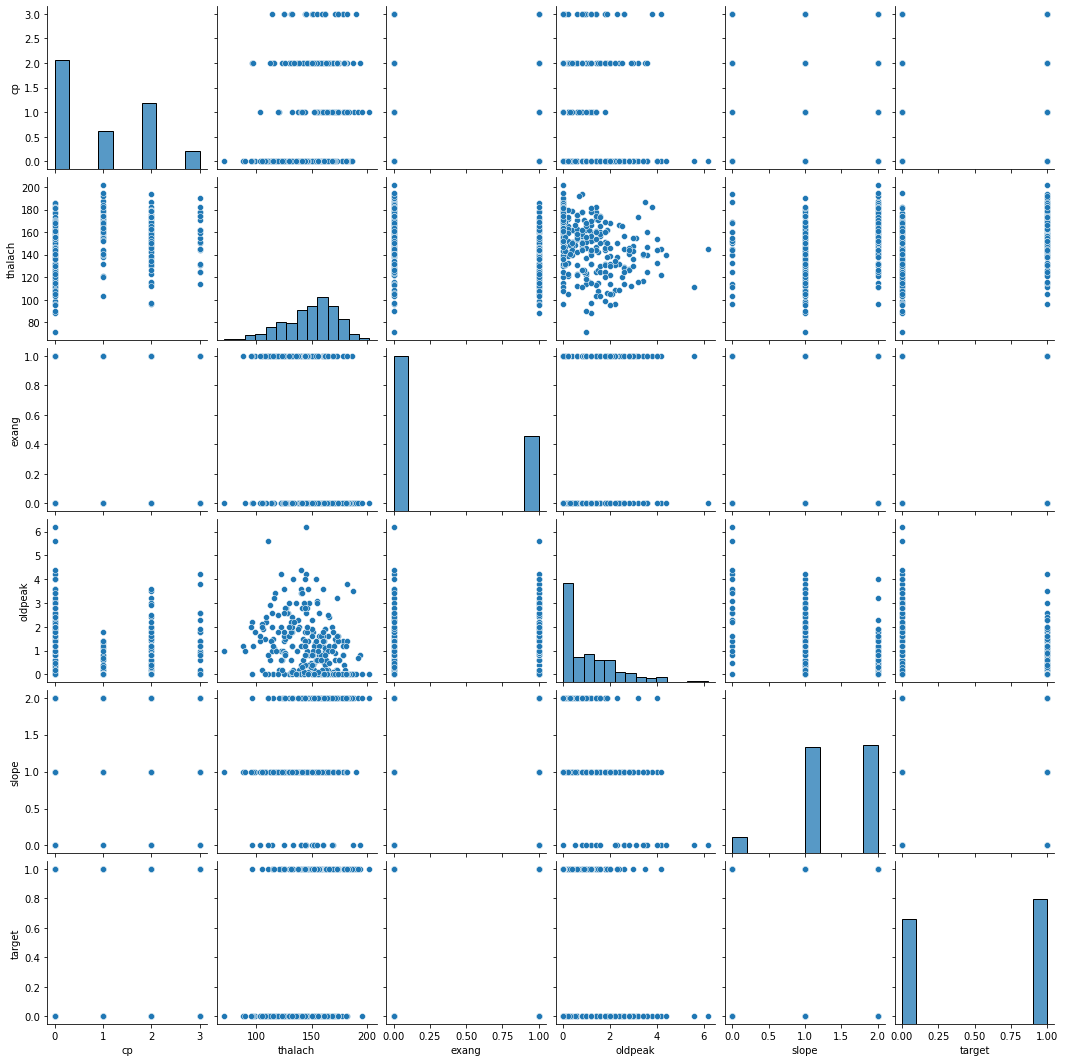

In [147]:
sns.pairplot(df2)

In [148]:
df2 = df1[['cp','thalach','exang','oldpeak','slope','target']]

In [149]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   cp       303 non-null    int64   
 1   thalach  303 non-null    int64   
 2   exang    303 non-null    int64   
 3   oldpeak  303 non-null    float64 
 4   slope    303 non-null    int64   
 5   target   303 non-null    category
dtypes: category(1), float64(1), int64(4)
memory usage: 12.4 KB


- Datatype of 'target' is category.

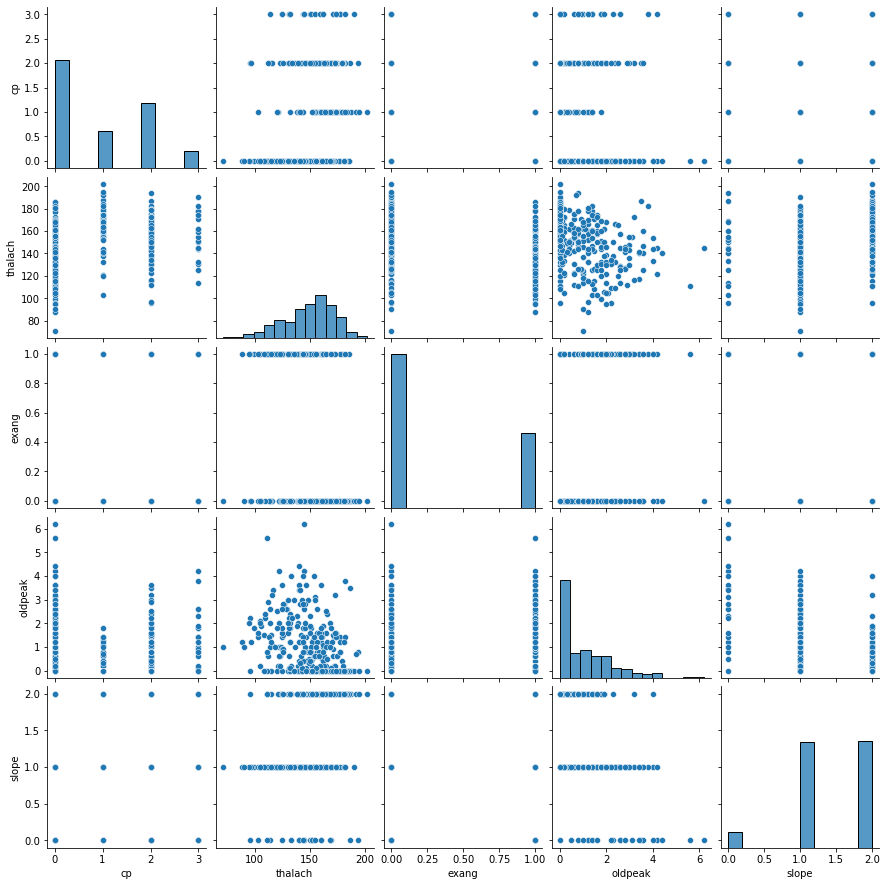

In [62]:
sns.pairplot(df2)

In [150]:
df2.corr()

,cp,thalach,exang,oldpeak,slope
cp,1.000000,0.295762,-0.394280,-0.149230,0.119717
thalach,0.295762,1.000000,-0.378812,-0.344187,0.386784
exang,-0.394280,-0.378812,1.000000,0.288223,-0.257748
oldpeak,-0.149230,-0.344187,0.288223,1.000000,-0.577537
slope,0.119717,0.386784,-0.257748,-0.577537,1.000000


<AxesSubplot:>

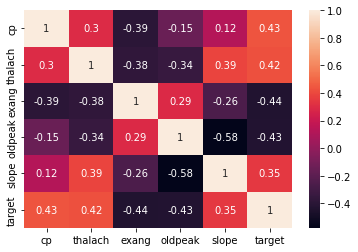

In [171]:
sns.heatmap(df2.corr(), annot=True)

### Distribution of the numerical features

In [152]:
age_s = df['age']

(array([ 1., 11., 33., 38., 37., 60., 63., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

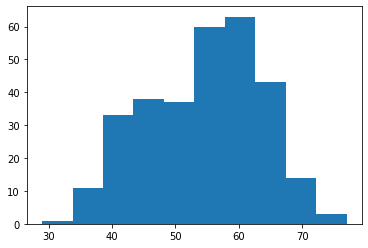

In [153]:
plt.hist(age_s)

### Inference:
- People under the age of 60 and above 50 ranges from 0 to 60.
- Range of people above 70 and below 30 is very less.
- Average age of people is between 50 and 60. 
- Maximum people being diagnosed for heart disease have age between 40 and 70.

(array([ 7., 24., 25., 24.,  9.,  3.,  3.,  0.,  0.,  1.]),
 array([141. , 183.3, 225.6, 267.9, 310.2, 352.5, 394.8, 437.1, 479.4,
        521.7, 564. ]),
 <BarContainer object of 10 artists>)

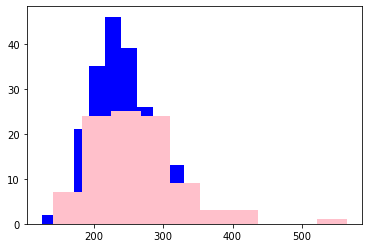

In [154]:
plt.hist(df.loc[df['sex'] == 1]['chol'], label="Male",color='blue')
plt.hist(df.loc[df['sex'] == 0]['chol'], label="Female",color='pink')

### Inference:
- Most of the females have cholestrol level between 200 to 300 with a wider range of distibution under 20.
- Males having cholestrol level between 200-300 are under the range of 40 with less distribution.

### Training and Testing Data

In [155]:
x = df2.drop(columns='target', axis=1)
y = df2['target']

In [156]:
x

,cp,thalach,exang,oldpeak,slope
0,3,150,0,2.3,0
1,2,187,0,3.5,0
2,1,172,0,1.4,2
3,1,178,0,0.8,2
4,0,163,1,0.6,2
...,...,...,...,...,...
298,0,123,1,0.2,1
299,3,132,0,1.2,1
300,0,141,0,3.4,1
301,0,115,1,1.2,1


In [157]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: category
Categories (2, int64): [0, 1]

In [158]:
## split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [159]:
# perform training with giniIndex
# create the classifier object
clf_gini = DecisionTreeClassifier(criterion = "gini",random_state=100,max_depth=3, min_samples_leaf=5)
# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=100)

In [160]:
# Function to make predictions
def prediction(x_test, clf_object):
    y_pred = clf_object.predict(x_test)
    print("Predicted values:")
    print(y_pred)
    return y_pred

In [161]:
def accuracy(y_test, y_pred):
    print("Accuracy : ", accuracy_score(y_test,y_pred)*100)

In [162]:
# Operational phase
print("Results using Gini Index:")
# Prediction using Gini
y_pred_gini = prediction(x_test, clf_gini)
accuracy(y_test,y_pred_gini)

Results using Gini Index:
Predicted values:
[0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1
 1 1]
Accuracy :  76.31578947368422


In [163]:
y_pred_gini_train = prediction(x_train, clf_gini)
accuracy(y_train,y_pred_gini_train)

Predicted values:
[1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0
 1 1 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 0 1 1 0
 1 0 1 0 0 1 1 0 1 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1]
Accuracy :  79.29515418502203


As we can see that the accuracy score on the test data and train data is almost similar, we can conclude that our model is not over fitted.

In [164]:
model = LogisticRegression()

In [165]:
model.fit(x_train, y_train)

LogisticRegression()

In [167]:
# Building a predictive system
input_data = (3, 150, 0, 2.3, 0)
input_data_as_numpy_array = np.asarray(input_data)
reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(reshaped)
print(prediction)
if prediction == 1:
    print("Defected Heart")
else:
    print("Healthy Heart")

[1]
Defected Heart
